In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
import subprocess
import sys

In [2]:
# Sizes of the data sets.
sizes = [100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000, 25000, 50000, 75000, 100000]
capacity = 10
ntrials = 10
base_dir = os.getcwd()
exec_dir = "../.."
output_file = '{}/test_construction.csv'.format(base_dir)

In [3]:
# Test the implementation.

f = open(output_file, 'w')

os.chdir(exec_dir)

for m in sizes:
    print('Testing m={}...'.format(m))
    input_file = "{}/records_{}_0_1000.bin".format(base_dir, m)
    print('Input file: ' + input_file)
    avg = 0
    for i in range(0, ntrials):
        p = subprocess.run(["java", "TestIndex", input_file, str(capacity)], capture_output=True, check=True)
        lines = p.stdout.decode('utf-8').splitlines()
        avg += int((lines[2].split(' '))[2])
    avg = avg / ntrials
    print(avg)
    f.write('{},{}\n'.format(m, avg))

f.close()

os.chdir(base_dir)

Testing m=100...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_100_0_1000.bin
23478509.3
Testing m=250...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_250_0_1000.bin
27086991.9
Testing m=500...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_500_0_1000.bin
30193099.2
Testing m=750...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_750_0_1000.bin
32929710.2
Testing m=1000...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_1000_0_1000.bin
34504196.3
Testing m=2500...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_2500_0_1000.bin
50224718.2
Testing m=5000...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_5000_0_1000.bin
64826660.9
Testing m=7500...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction/records_7500_0_1000.bin
83059309.5
Testing 

In [2]:
# Print the results.
pd.set_option("display.precision", 3)
df1 = pd.read_csv('test_construction.csv', header=None)
df1.columns = ['m', 'time']
df1.sort_values(ascending=True, by='m', inplace=True)
df1['time'] /= 1000000
df1

,m,time
0,100,23.479
1,250,27.087
2,500,30.193
3,750,32.930
4,1000,34.504
5,2500,50.225
6,5000,64.827
7,7500,83.059
8,10000,93.523
9,25000,147.035


In [3]:
print(df1.to_latex(index=False, escape=False))

\begin{tabular}{rr}
\toprule
      m &     time \\
\midrule
    100 &   23.479 \\
    250 &   27.087 \\
    500 &   30.193 \\
    750 &   32.930 \\
   1000 &   34.504 \\
   2500 &   50.225 \\
   5000 &   64.827 \\
   7500 &   83.059 \\
  10000 &   93.523 \\
  25000 &  147.035 \\
  50000 &  190.116 \\
  75000 &  205.600 \\
 100000 &  242.223 \\
\bottomrule
\end{tabular}



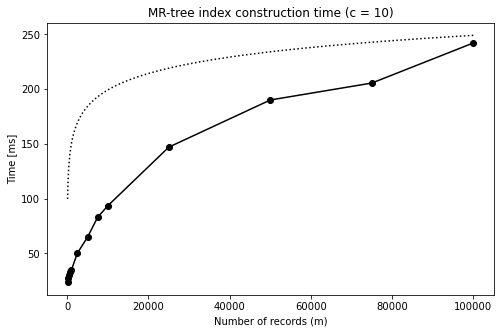

In [11]:
# Generate a plot.
plt.figure(figsize=(8, 5))
plt.title("MR-tree index construction time (c = 10)")
plt.plot(df1['m'], df1['time'], marker='o', color='black')
plt.plot([x for x in range(100, 100000)], 
         [15*np.log2(x) for x in range(100, 100000)], color='black', linestyle=':')
plt.ylabel("Time [ms]")
plt.xlabel("Number of records (m)")
plt.savefig("test_construction_m.png", dpi=170, format='png', bbox_inches='tight')